<a href="https://colab.research.google.com/github/Poa463/AntiScrapeArt/blob/main/%E3%83%8E%E3%82%A4%E3%82%BA%E7%94%9F%E6%88%90%E6%A9%9F%E8%83%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FloatSlider(value=0.42, description='Epsilon', max=0.5, min=0.01, step=0.01)

Button(description='Save Image', style=ButtonStyle())

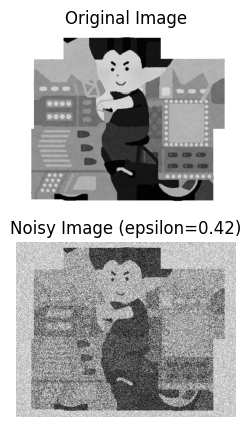

In [ ]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, Button
from IPython.display import display, clear_output
from google.colab import drive

# Google Driveをマウント
drive.mount('/content/drive')

# Google Drive内の画像パスを指定
image_path = '/content/drive/MyDrive/ColabImages/jitensya_dekochari_man.png'  # 画像パスに変更

# 画像を読み込んでテンソルに変換
image = Image.open(image_path).convert('L')  # グレースケールに変換
image = torch.tensor(np.array(image), dtype=torch.float32).unsqueeze(0) / 255.0  # 0〜1にスケーリング

# ノイズ生成関数
def generate_noise(image, epsilon=0.1):
    noise = epsilon * torch.sign(torch.randn_like(image))
    noisy_image = image + noise
    noisy_image = torch.clamp(noisy_image, 0, 1)  # 0〜1にクリッピング
    return noisy_image

# epsilon用のスライダー作成（最大値を0.5に変更）
epsilon_slider = FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='Epsilon')
display(epsilon_slider)

# 保存ボタン作成
save_button = Button(description="Save Image")
display(save_button)

# プレビュー用の関数
def update_plot(change=None):
    epsilon = epsilon_slider.value
    noisy_image = generate_noise(image, epsilon)

    # プレビュー表示を更新
    clear_output(wait=True)
    display(epsilon_slider, save_button)

    # 元の画像のプレビュー
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.title("Original Image")
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis('off')

    # ノイズ付き画像のプレビュー
    plt.subplot(2, 1, 2)
    plt.title(f"Noisy Image (epsilon={epsilon})")
    plt.imshow(noisy_image.squeeze(), cmap="gray")
    plt.axis('off')
    plt.show()

# 画像の保存関数
def save_image(b):
    epsilon = epsilon_slider.value
    noisy_image = generate_noise(image, epsilon)

    # Google Driveの保存先
    save_path = '/content/drive/MyDrive/noisy_image_output'
    noisy_image_pil = Image.fromarray((noisy_image.squeeze().numpy() * 255).astype(np.uint8))

    # ファイル名にepsilon値を含めて保存
    filename = f'{save_path}/noisy_image_epsilon_{epsilon:.2f}.png'
    noisy_image_pil.save(filename)
    print(f"Image saved successfully at: {filename}")

# 保存ボタンがクリックされたときに画像を保存
save_button.on_click(save_image)

# スライダーの値が変わるたびにプレビューを更新
epsilon_slider.observe(update_plot, names='value')

# 初回のプレビュー表示
update_plot()
